In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import corner
import batman
import emcee
import time
from multiprocessing import Pool
from IPython.display import display, Math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck

from exotic_ld import StellarLimbDarkening

import pandas as pd
import pickle

import celerite2
from celerite2 import terms


In [5]:
def set_params(params, yerrs):
    _sigma, _rho, _tau = params
    kernel = terms.SHOTerm(sigma = _sigma, rho  = _rho, tau = _tau)
    gp = celerite2.GaussianProcess(kernel, mean=0.0,)
    gp.compute(t, yerr=yerrs, quiet=True)

    return gp

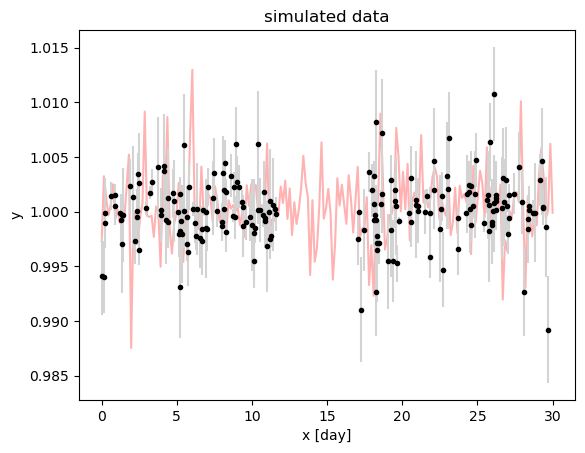

In [6]:
#2 minute cadence = 720 samples in 1 day 

t = np.sort(np.append(
        np.random.uniform(0, 12, 100), 
        np.random.uniform(17, 30, 100),
    ))  # The input coordinates must be sorted
yerr = np.random.uniform(0.0001, 0.005, len(t))
y = (1 + 0.00001*np.sin(t + 6) + yerr * np.random.randn(len(t)))

true_t = np.linspace(0, 30, len(t))
true_y = (1 + 0.0000001*np.sin(true_t + 6) + yerr * np.random.randn(len(true_t)))

plt.plot(true_t, true_y, lw=1.5, alpha=0.3, color="r", zorder=0)
plt.errorbar(t, y, yerr=yerr, fmt=".", color="black", ecolor="LightGrey", capsize=0, zorder=100)
plt.xlabel("x [day]")
plt.ylabel("y")
_ = plt.title("simulated data")


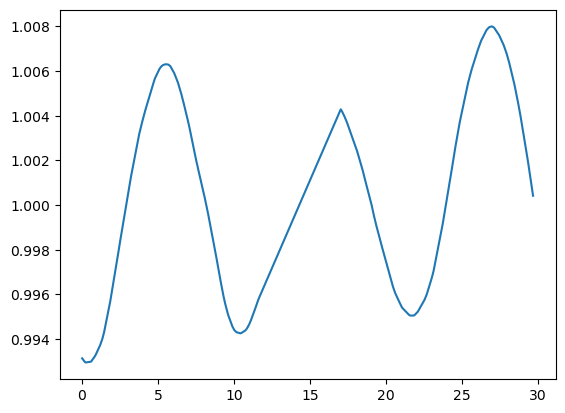

In [13]:
_sigma, _rho, _tau = [0.005, 10, 100]
#Sigma - Amplitude, 
#Rho - fixed/??
#Tau - length scale


kernel = terms.SHOTerm(sigma = _sigma, rho  = _rho, tau = _tau)
gp = celerite2.GaussianProcess(kernel, mean=1.0)

gp.compute(t)
gp_sample = gp.sample()
plt.plot(t, gp_sample)